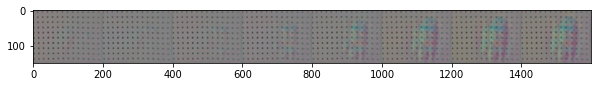

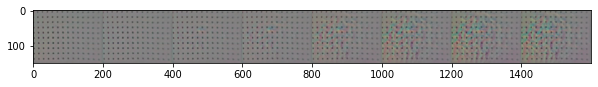

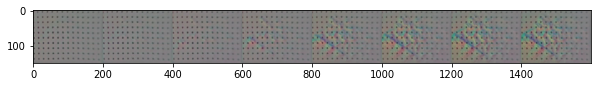

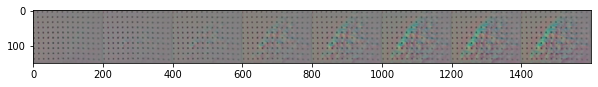

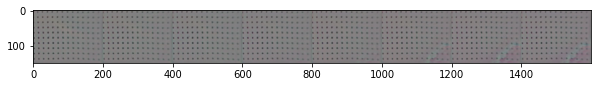

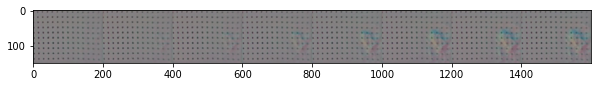

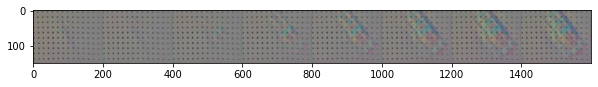

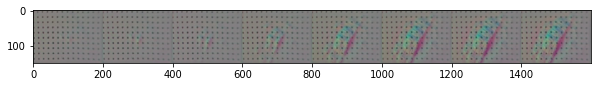

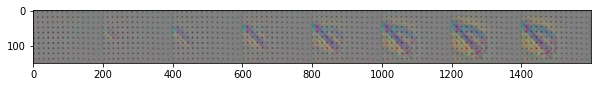

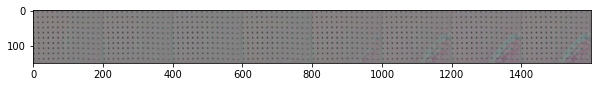

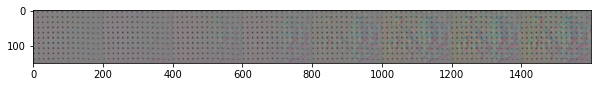

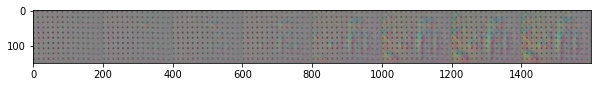

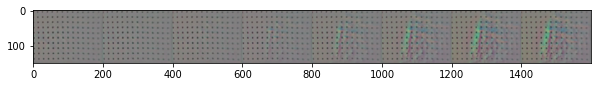

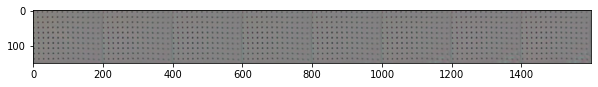

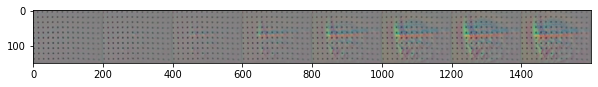

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


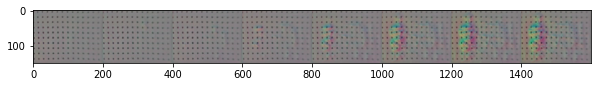

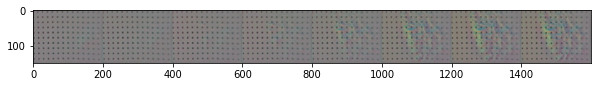

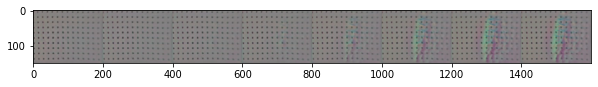

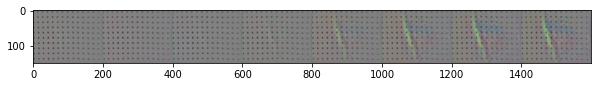

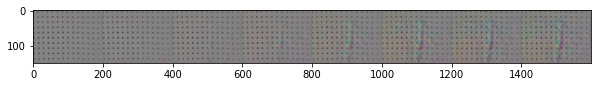

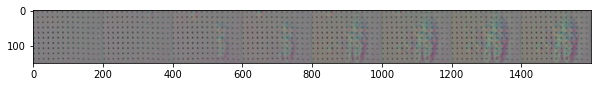

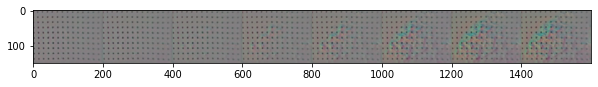

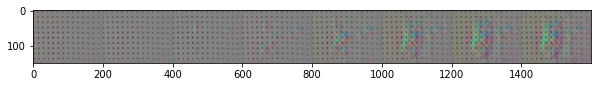

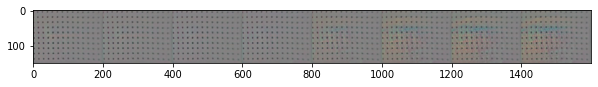

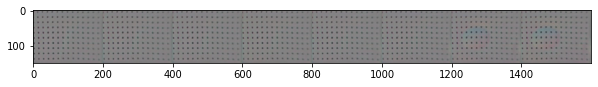

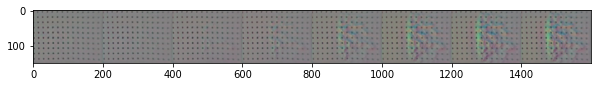

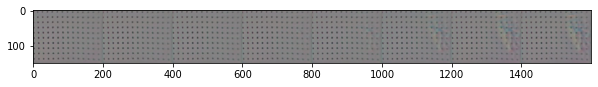

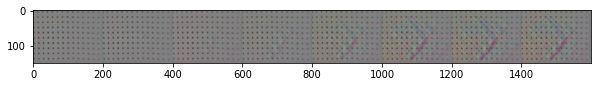

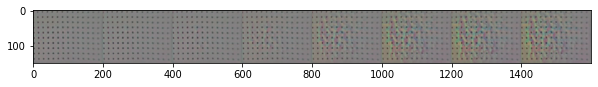

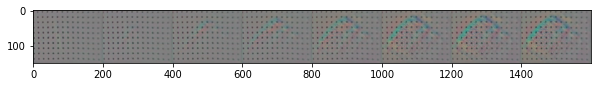

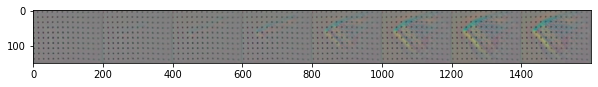

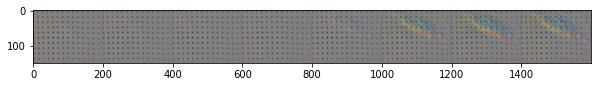

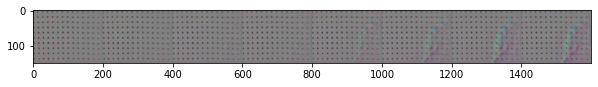

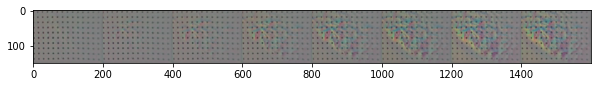

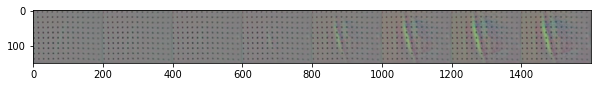

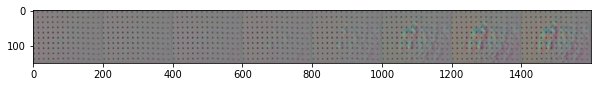

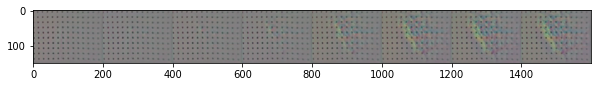

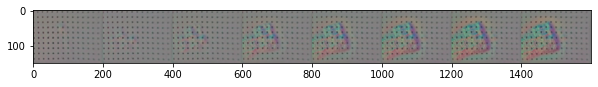

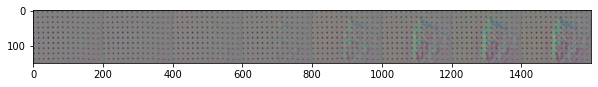

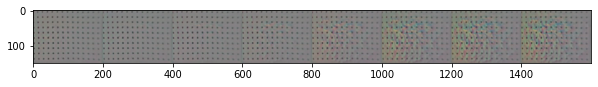

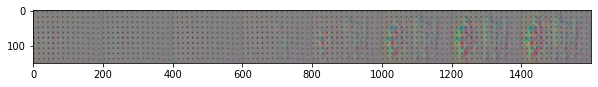

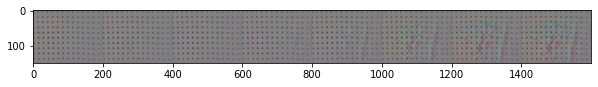

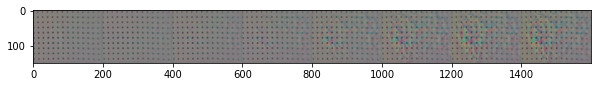

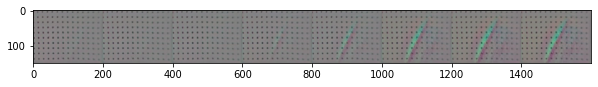

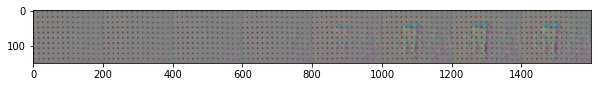

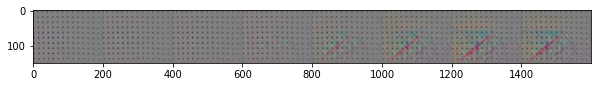

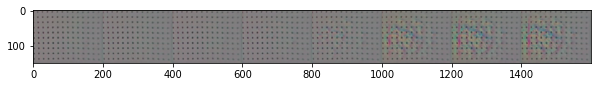

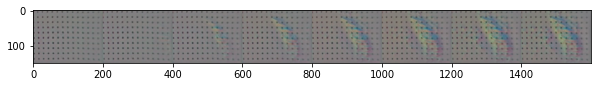

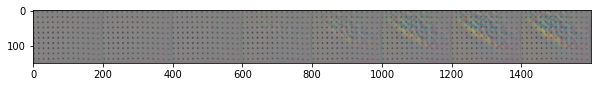

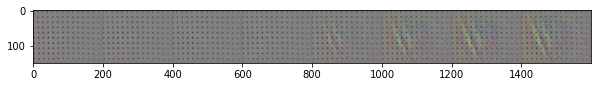

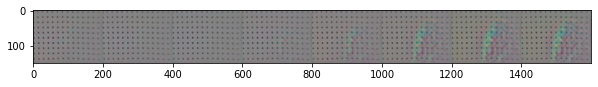

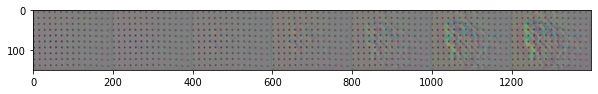

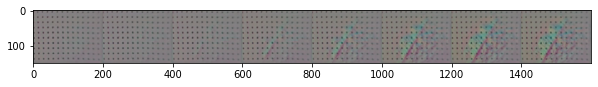

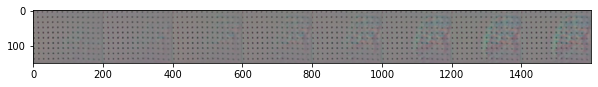

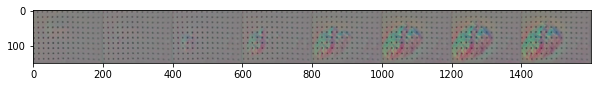

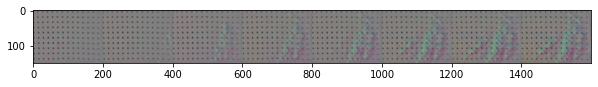

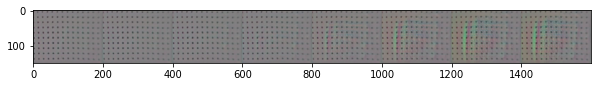

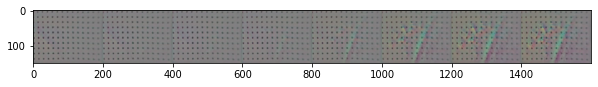

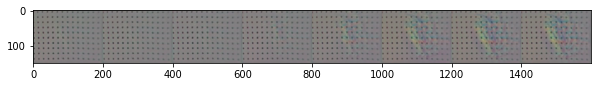

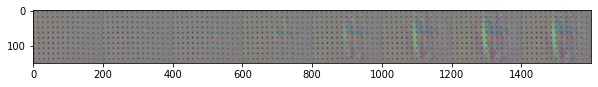

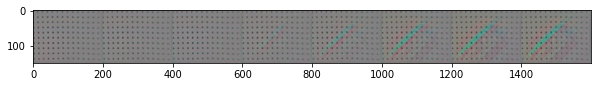

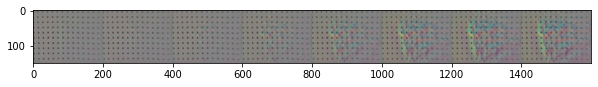

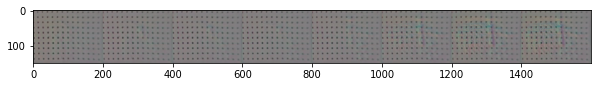

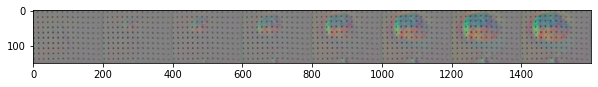

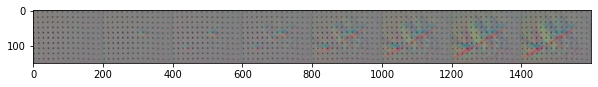

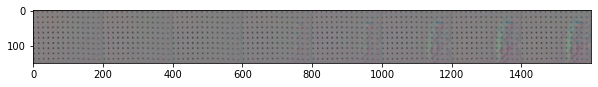

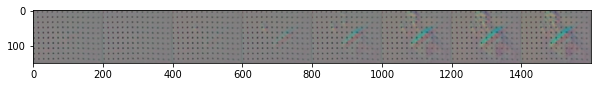

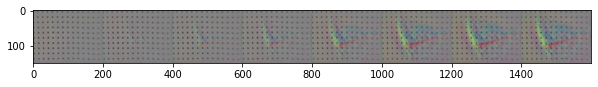

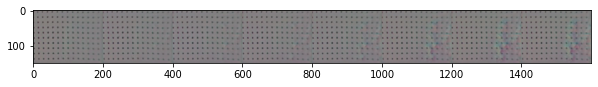

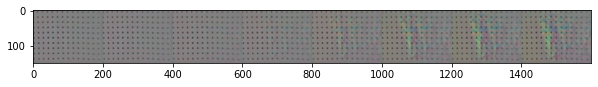

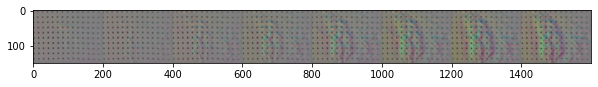

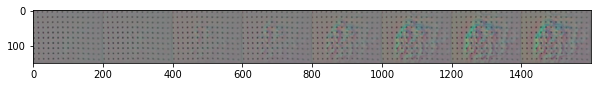

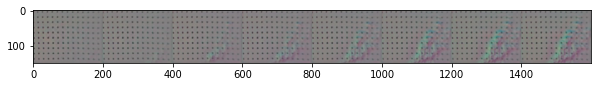

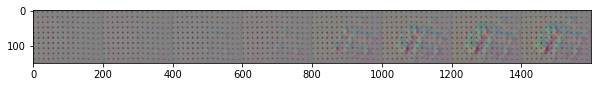

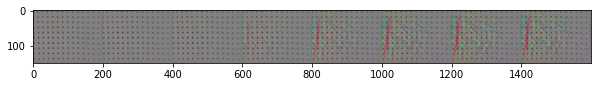

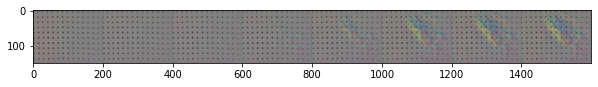

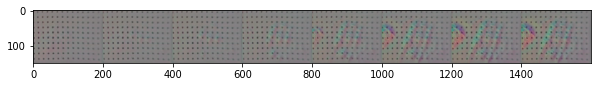

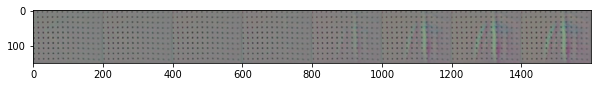

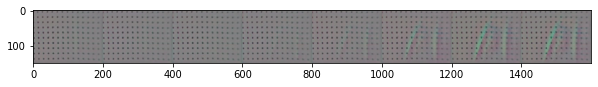

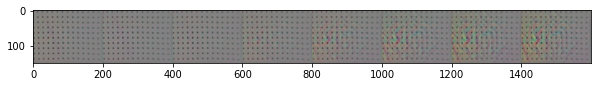

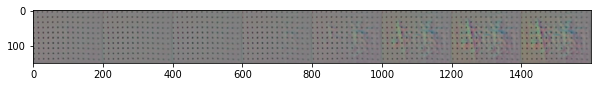

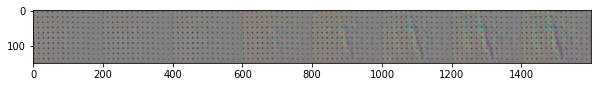

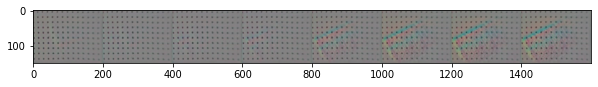

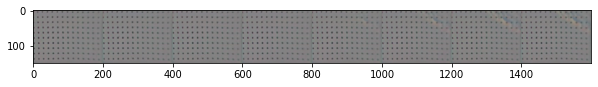

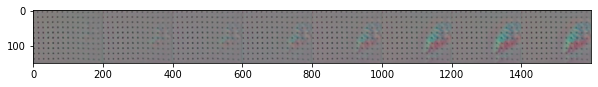

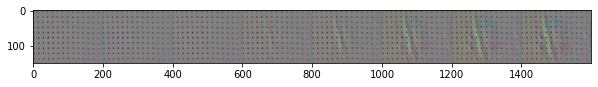

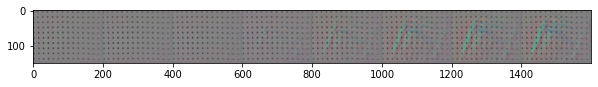

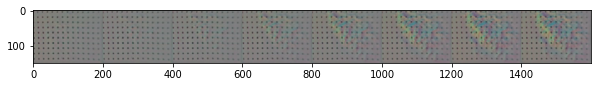

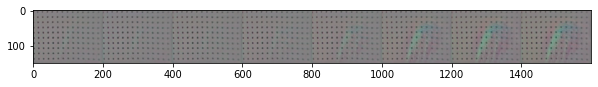

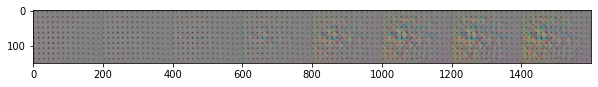

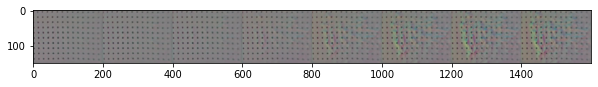

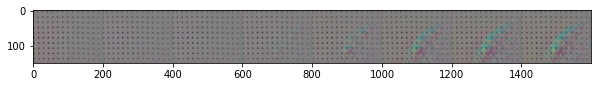

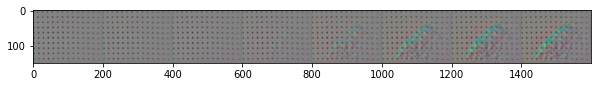

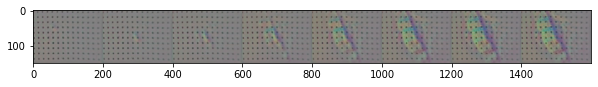

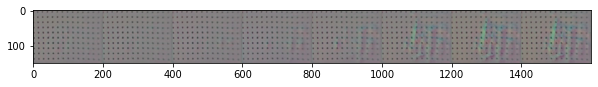

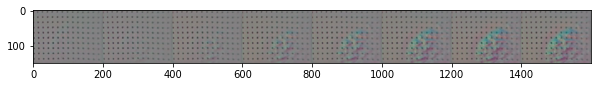

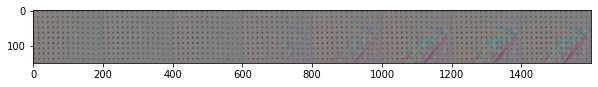

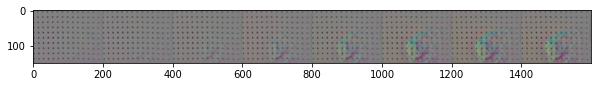

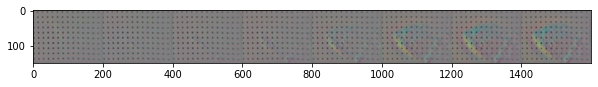

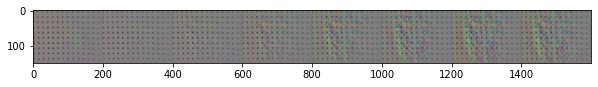

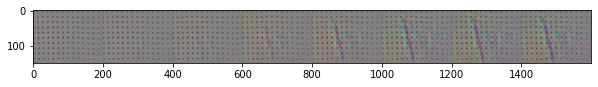

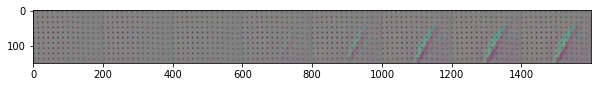

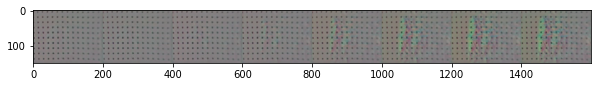

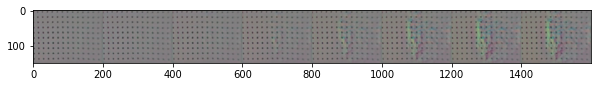

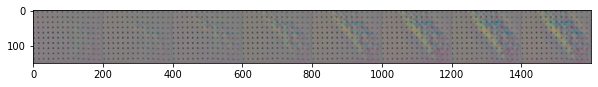

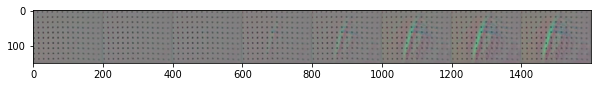

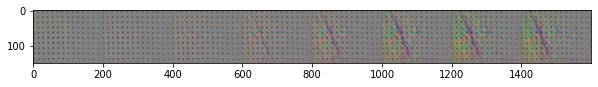

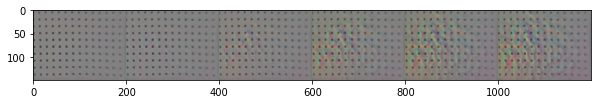

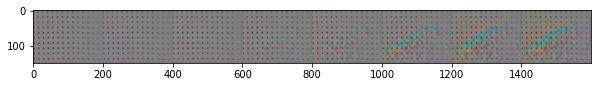

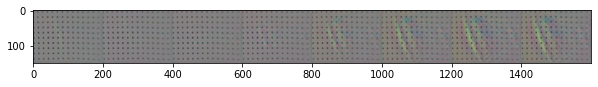

In [27]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt



def load_video(data_dir, category="fold"):
    fn_list = glob.glob(os.path.join(data_dir, category, "*.mov"))
    
    frame0 = cv2.imread(os.path.join(data_dir, "frame0.jpg"))
    frame0 = cv2.GaussianBlur(frame0, (31, 31), 0)
    
    for fn in fn_list:
        cap = cv2.VideoCapture(fn)

        frame_list = []
        while(cap.isOpened()):
            ret, frame = cap.read()
            if not ret:
                break
            diff = (frame * 1. - frame0) / 255. + 0.5
            frame_list.append(diff)
            
        frame_stacked = np.hstack(frame_list[5::5])
        plt.figure(figsize=(10, 10))
        plt.imshow(frame_stacked[:,:,::-1])
        plt.show()
        

    cap.release()
    
data_dir = "data/08272021/"
load_video(data_dir=data_dir, category="fold")
    